# ARIMA MODEL


**Time Series** - Time Series are a series of data points indexed in time order, most commonly a sequence taken at successive equally space points in time 

**Time Series Analysis** - these are the methods for analyzing time series data in order to extract meaningful statistics and characteristics of the data

**Time Series Forecasting** - this is the use of a model to predict future values based on previously observed values

## ARIMA Model ##
This model, which is *autoregressive integrated moving average* makes generalisations about *autogressive moving average model* to non-stationary series and periodic variations. The purpose of these generalisations is to fit data as well as possible to predict future values


**Stationarity** - a stationary series has no trend (the series isn't shrinking or growing), the variance is constat (the average distance of each value from zero is the same) and autocorrelation is constant (how each value in the time series is related to its neighbours).

**Train-test split** - this is different from normal ML models as it uses the past value to make future predictions, training the model on the data earlier on in the series and test on later values.

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

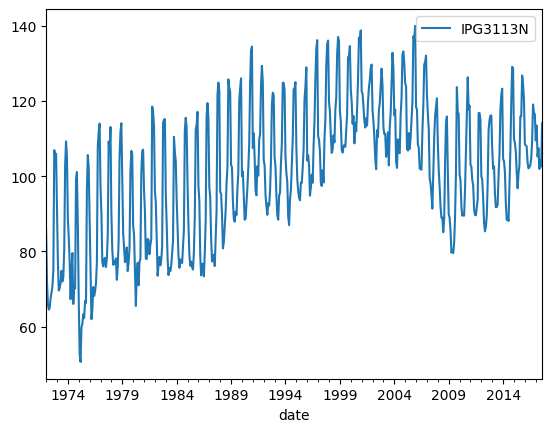

In [96]:
candy = pd.read_csv('/Users/ameliemajor/Desktop/Internship Cycle 2024-25/Financial-Models/data/candy_production.csv', 
            index_col='date',
            parse_dates=True)
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

Split into Train-test split

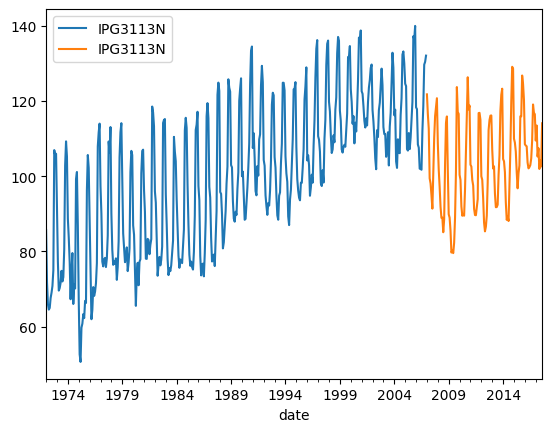

In [97]:
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

fig, ax = plt.subplots()
candy_train.plot(ax=ax, label='Train')
candy_test.plot(ax=ax, label='Test')
plt.show()

## How do we make time series stationary? ##

The most common test for non-stationarity is the augmented Dicky-Fuller test using null hypothesis. **It only tests for trend stationarity**


### Interpreting Results
* The first value is the test statistic, the more negative it is, the more likely the series is stationary

* The second element is the p-value, if the p-value is small, reject null hypothesis, reject non-stationary if it is smaller than 0.05

*  The third value is critcial test statistics of p-values

* Remember to also plot the graph to avoid assumptions

### Making it stationary

You can do this by taking its difference, subract the previous value from the current value then drop the NaN value. You may also transform it by taking the log or square root. First, due to the only data available for earthquakes not having the necessary "earthquakes_per_year" column, a little preprocessing is required.

In [98]:
df = pd.read_csv("/Users/ameliemajor/Desktop/Internship Cycle 2024-25/Financial-Models/data/earthquake_1995-2023.csv")
df["date_time"] = pd.to_datetime(df["date_time"], format="%d-%m-%Y %H:%M")
df["year"] = df["date_time"].dt.year
df_counts = df.groupby("year").size().reset_index(name="earthquakes_per_year")
df_counts.to_csv("/Users/ameliemajor/Desktop/Internship Cycle 2024-25/Financial-Models/data/earthquakes_per_year.csv", index=False)
print(df_counts)

    year  earthquakes_per_year
0   1995                    29
1   1996                    35
2   1997                    28
3   1998                    23
4   1999                    33
5   2000                    35
6   2001                    28
7   2002                    25
8   2003                    31
9   2004                    32
10  2005                    28
11  2006                    26
12  2007                    37
13  2008                    25
14  2009                    26
15  2010                    41
16  2011                    34
17  2012                    31
18  2013                    53
19  2014                    48
20  2015                    53
21  2016                    43
22  2017                    36
23  2018                    43
24  2019                    33
25  2020                    27
26  2021                    42
27  2022                    41
28  2023                    34


In [99]:
from statsmodels.tsa.stattools import adfuller
earthquakes = pd.read_csv('/Users/ameliemajor/Desktop/Internship Cycle 2024-25/Financial-Models/data/earthquakes_per_year.csv')
result = adfuller(earthquakes['earthquakes_per_year'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -3.170638184874068
p-value: 0.021748415074250377
Critical Values:
   1%: -3.6889256286443146
   5%: -2.9719894897959187
   10%: -2.6252957653061224


Here I am going to use the difference to convert a non-stationary time series to a stationary one. In this instance, I will use the population of london to demonstrate the application. First I plot the original data, then plot the difference. 

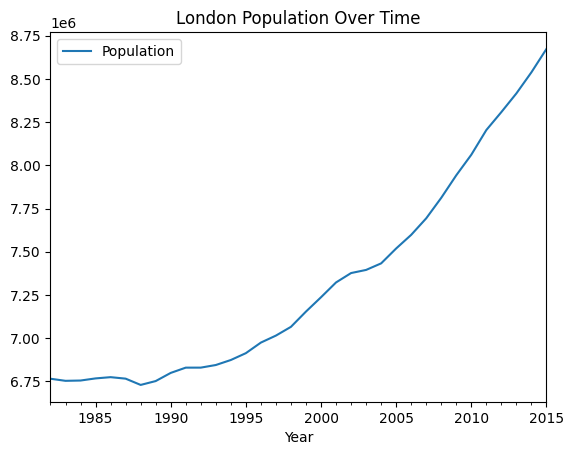

ADF Statistic: 0.7905944456761851
p-value: 0.9914828177369085


In [100]:
city = pd.read_csv('/Users/ameliemajor/Desktop/Internship Cycle 2024-25/Financial-Models/data/london-population-history.csv',
                   parse_dates=['Year'], dayfirst=True)
result = adfuller(city['Population'])
fig, ax = plt.subplots()
city.plot(x='Year', y='Population', title='London Population Over Time', ax=ax)
plt.show()

print('ADF Statistic:', result[0])
print('p-value:', result[1])


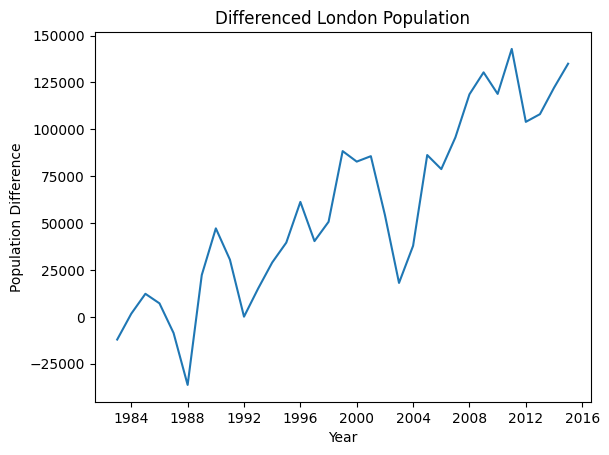

ADF Statistic: 0.7031089106564643
p-value: 0.9898997094423911


In [101]:
city_stationary = city['Population'].diff().dropna()
result = adfuller(city_stationary)
fig, ax = plt.subplots()
ax.plot(city['Year'].iloc[1:], city_stationary)
ax.set_title('Differenced London Population')
ax.set_xlabel('Year')
ax.set_ylabel('Population Difference')
plt.show()
print('ADF Statistic:', result[0])
print('p-value:', result[1])


Repeat this process, taking the second difference

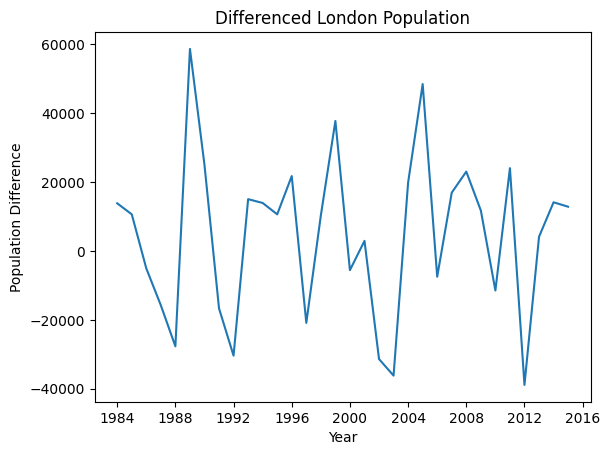

ADF Statistic: -4.1036814693601915
p-value: 0.0009550424557054338


In [102]:
city_stationary_two = city_stationary.diff().dropna()
result = adfuller(city_stationary_two)
fig, ax = plt.subplots()
ax.plot(city['Year'].iloc[2:], city_stationary_two)
ax.set_title('Differenced London Population')
ax.set_xlabel('Year')
ax.set_ylabel('Population Difference')
plt.show()
print('ADF Statistic:', result[0])
print('p-value:', result[1])

## Other Transform Approaches

Sometimes, the necessary apporach is to not use differencing but use logs. The classic way of transforming stock time series is the log-return of the series, this is calculated as:
$`log_return(y_t) = log(\frac{y_t}{y_{t-1}})`$





In [104]:
# load amazon data into the amazon dataframe

amazon = pd.read_csv('/Users/ameliemajor/Desktop/Internship Cycle 2024-25/Financial-Models/data/amazon_stock_data.csv', parse_dates=['Date'], dayfirst=True)
amazon.plot()
plt.show()


/var/folders/gr/j8nwj3f15hgg45p8gkw2c5b00000gn/T/ipykernel_15528/2382414666.py:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  amazon = pd.read_csv('/Users/ameliemajor/Desktop/Internship Cycle 2024-25/Financial-Models/data/amazon_stock_data.csv', parse_dates=['Date'], dayfirst=True)


ValueError: Date ordinal -5216458.621875 converts to -12313-10-27T09:04:30.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 640x480 with 1 Axes>